# Logistic Map

### $X_{n+1} = r X_{n}(1-X_{n})$

where $r$ is the rate



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize CPU

In [2]:
# Initializing variables
x_init = 0.4         # Initial valur of the X or X_0
#iteration = 0        # Iteration counter
max_iteration = 2000  # Max number of iterations
r = 3.7             # Rate of reproduction
score_cpu = pd.DataFrame(columns =['Iter','Xn', 'r', 'Xn+1'],dtype=float)

#scrn = np.array([])
#scrnp1 = np.array([])


In [3]:
# Function to calculate X_new from X_old
def logisticMapCPU(x,score):

    res = score.copy()
    k = True   # Check if convergence point has occcured
    
    for i in range (max_iteration):
        
        xNew = r*x*(1-x)

        rowData = pd.DataFrame([[i,x,r,xNew]], columns=['Iter','Xn', 'r', 'Xn+1'],dtype=float)
        res = res.append(rowData,ignore_index=True)

        if(xNew == x and k):
            print("Convergence point is at epoch", i, "and the value is",x)
            k=False
        x = xNew
    return res

In [4]:
score_cpu = logisticMapCPU(x_init,score_cpu)

In [5]:
score_cpu.shape

(2000, 4)

In [6]:
score_cpu

,Iter,Xn,r,Xn+1
0,0.0,0.400000,3.7,0.888000
1,1.0,0.888000,3.7,0.367987
2,2.0,0.367987,3.7,0.860519
3,3.0,0.860519,3.7,0.444097
4,4.0,0.444097,3.7,0.913437
...,...,...,...,...
1995,1995.0,0.889805,3.7,0.362792
1996,1996.0,0.362792,3.7,0.855344
1997,1997.0,0.855344,3.7,0.457804
1998,1998.0,0.457804,3.7,0.918412


<AxesSubplot:xlabel='Iter', ylabel='Xn+1'>

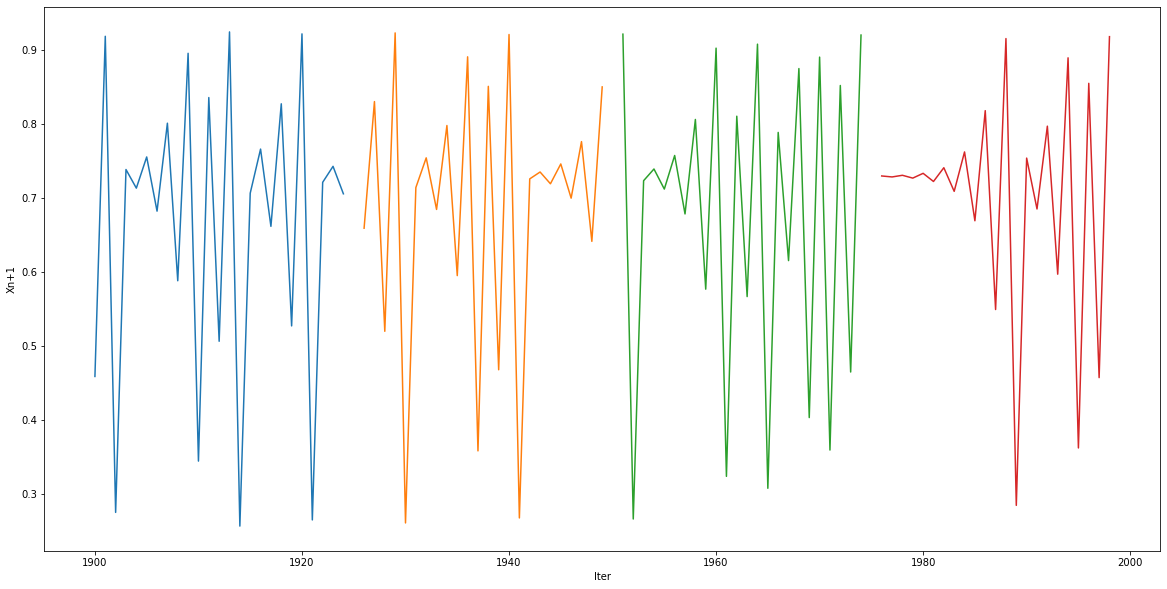

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score_cpu[1900:1925],err_style="bars")
sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score_cpu[1926:1950],err_style="bars")
sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score_cpu[1951:1975],err_style="bars")
sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score_cpu[1976:1999],err_style="bars")
#sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score[900:949],err_style="bars")
#sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score[949:999],err_style="bars")

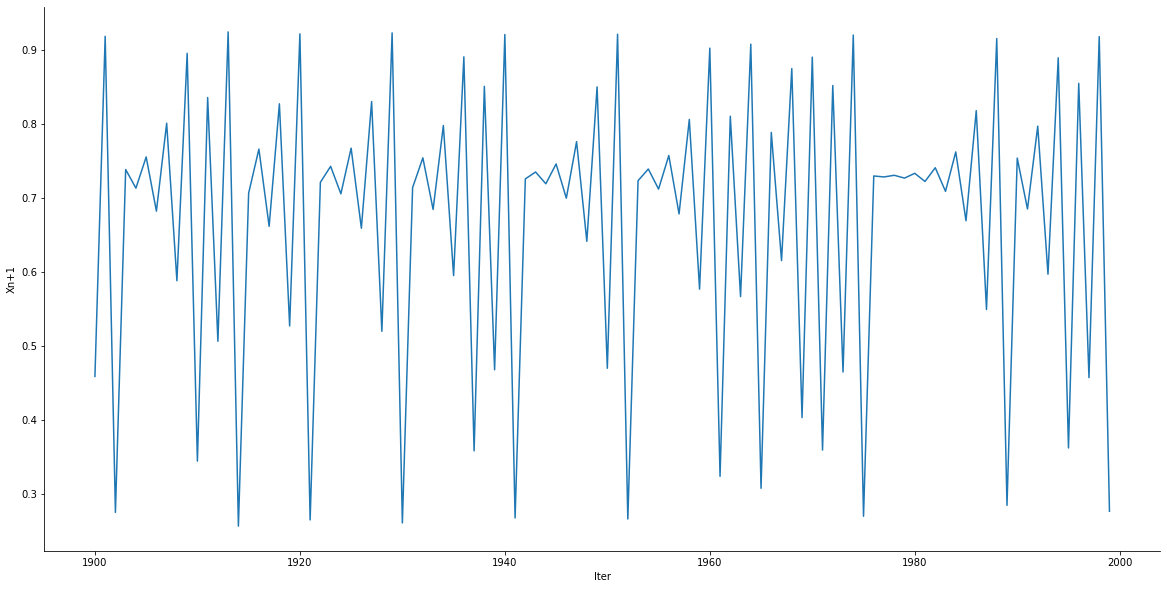

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.lineplot(x="Iter",y="Xn+1", markers=True,data=score_cpu[max_iteration-100:max_iteration],err_style="bars")
#sns.violinplot(data=score[99990:100000], inner="points", x="Iter",y="Xn+1",)  
sns.despine()

# Initialize tensor on CPU

In [9]:
# Import Torch related libraries
import torch

In [10]:
torch.cuda.device_count()

1

### Display name of the default torch device

In [11]:
score_pytorch_cpu = torch.empty((max_iteration,1),dtype=torch.float32, device="cpu")

In [13]:
def logisticMapPyTorchOld(x, popRate):
    global score
    global k
    global max_iteration
    global iteration
    
    xn[iteration] = popRate*x*(1-x)
    
    iteration += 1

    if(xn[iteration] == x and k):
        print("Convergence point is at epoch", iteration, "and the value is",x)
        k=False

    if (iteration <= max_iteration):
      logisticMapCalc(xn[iteration-1],popRate)

In [14]:
def logisticMapPyTorch(x, res):
    #res = score.copy()
    k = True   # Check if convergence point has occcured
    
    for i in range (max_iteration):
        
        res[i] = r*x*(1-x)
        
        #C_xNew = torch.multiply(torch.multiply(r, x),(1-x))
        #print ('C_xNew ',C_xNew)

        #rowData = pd.DataFrame([[i,x,r,xNew]], columns=['Iter','Xn', 'r', 'Xn+1'],dtype=float)
        #res = res.append(rowData,ignore_index=True)

        if(res[i] == x and k):
            print("Convergence point is at epoch", i, "and the value is",x)
            k=False
        x = res[i]
    #return res

In [15]:
logisticMapPyTorch(x_init, score_pytorch_cpu) # calling Logistic Map function with initial values

<AxesSubplot:>

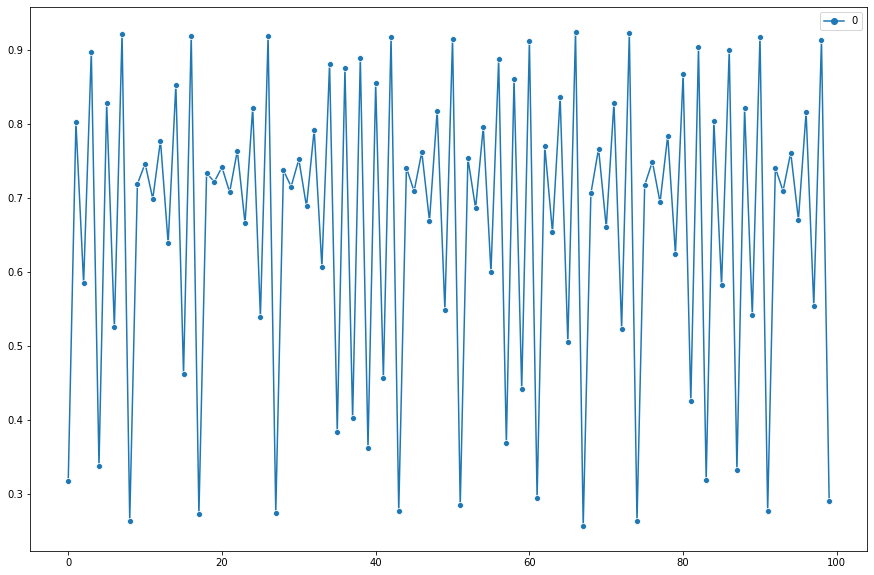

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

score_pytorch_cpu_numpy = score_pytorch_cpu.numpy()

sns.lineplot(markers=True,data=score_pytorch_cpu_numpy[max_iteration-100:max_iteration],err_style="bars")

# Initialize Tensor on GPU

In [17]:
# Check if CUDA devoce is present
torch.cuda.is_available() #Check if GPU is available

True

In [18]:
# If CUDA device is present, print the name of the device and set CUDA default device
if (torch.cuda.is_available()):
    print(torch.cuda.get_device_name(torch.cuda.current_device()))
    cuda = torch.device('cuda') # setting default CUDA device

GeForce GTX 1060 6GB


In [19]:
score_pytorch_gpu = torch.empty((max_iteration,1),dtype=torch.float32)

In [20]:
logisticMapPyTorch(x_init, score_pytorch_gpu) # calling Logistic Map function with initial values

<AxesSubplot:>

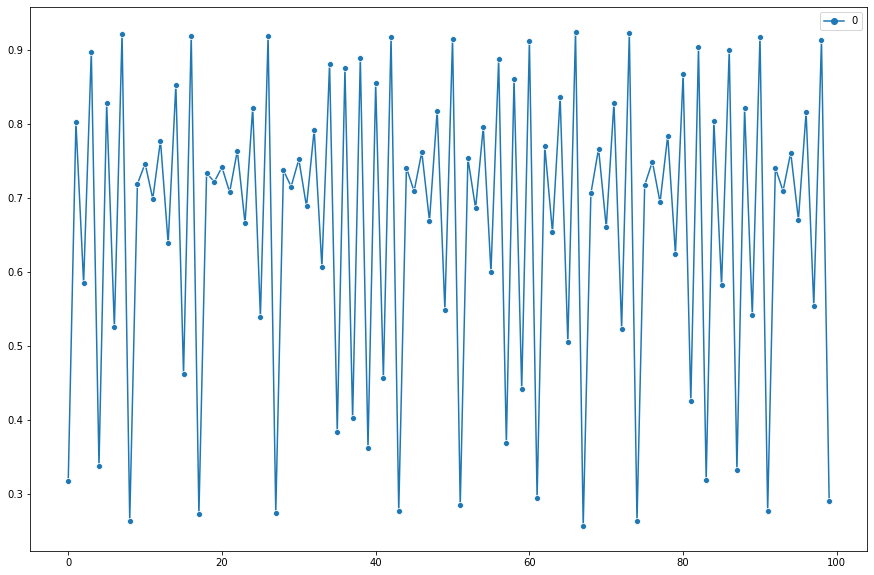

In [21]:
fig, ax = plt.subplots(figsize=(15,10))

score_pytorch_gpu_numpy = score_pytorch_gpu.numpy()

sns.lineplot(markers=True,data=score_pytorch_gpu_numpy[max_iteration-100:max_iteration],err_style="bars")

In [22]:
np.mean(score_pytorch_gpu_numpy)

0.6669442

In [23]:
np.std(score_pytorch_gpu_numpy)

0.20467372

In [24]:
len(score_pytorch_cpu_numpy.tolist())

2000

# Plotting CPU, Tensor-CPU and Tensor GPU readings

In [25]:
# Create a dataframe with CPU, Tensor_CPU and Tensor_GPU score array
df1 = pd.DataFrame()
temp_data = pd.DataFrame(score_cpu['Xn+1'])
temp_data['type'] = 'CPU'

#temp_cpu = pd.DataFrame(score_cpu['Xn+1'])

#consolidated_data = {'cpu': score_cpu['Xn+1'], 'tensor_cpu': score_pytorch_cpu_numpy.tolist(), 'tesnor_gpu': score_pytorch_gpu_numpy.tolist()}

df1 = df1.append(temp_data)

temp_data1 = pd.DataFrame({'Xn+1':score_pytorch_cpu_numpy.tolist()})
temp_data1['type'] = 'Tensor CPU'
df1 = df1.append(temp_data1)

temp_data2= pd.DataFrame({'Xn+1':score_pytorch_gpu_numpy.tolist()})
temp_data2['type'] = 'Tensor GPU'
df1 = df1.append(temp_data2)
df1.reset_index()



,index,Xn+1,type
0,0,0.888,CPU
1,1,0.367987,CPU
2,2,0.860519,CPU
3,3,0.444097,CPU
4,4,0.913437,CPU
...,...,...,...
5995,1995,[0.6712784171104431],Tensor GPU
5996,1996,[0.8164556622505188],Tensor GPU
5997,1997,[0.5544664859771729],Tensor GPU
5998,1998,[0.9140236377716064],Tensor GPU


In [26]:
# Box plot the above calculated array

#tips = sns.load_dataset("tips")

#fig, ax = plt.subplots(figsize=(5,5))
#ax = sns.lineplot(x=df1.index, y='Xn+1',data=df1)
#ax = sns.boxenplot(y="tensor_cpu", data=consolidated_data,palette="Set3")
#ax = sns.boxenplot(y="tensor_gpu", data=consolidated_data,palette="Set3")

In [ ]:
df1["Xn+1"]